In [1]:
import pandas as pd
import janitor
import seaborn as sns
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

## Infectious Disease

In [2]:
df = pd.read_csv('data/HOSPITAL.DAT.txt').clean_names()

In [3]:
df.head()

,id,dur_stay,age,sex,temp,wbc,antibio,bact_cul,service
0,1,5,30,2,99.0,8,2,2,1
1,2,10,73,2,98.0,5,2,1,1
2,3,6,40,2,99.0,12,2,2,2
3,4,11,47,2,98.2,4,2,2,2
4,5,5,25,2,98.5,11,2,2,2


##### 2.1 

In [4]:
df.dur_stay.mean()

8.6

In [5]:
df.dur_stay.median()

8.0

##### 2.2

In [6]:
df.dur_stay.std()

5.715476066494082

In [7]:
(df.dur_stay.min(), df.dur_stay.max())

(3, 30)

#### 2.3

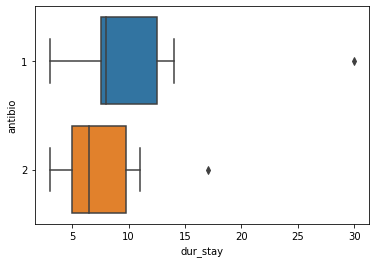

In [8]:
sns.boxplot(data=df, x='dur_stay', y='antibio', orient='h');

#### 2.4

Median will be also multiplied

In [9]:
(df.dur_stay*2).median(), df.dur_stay.median()*2

(16.0, 16.0)

#### 2.5

Mode will be also multiplied

In [10]:
(df.dur_stay*2).min(), (df.dur_stay*2).max()

(6, 60)

#### 2.6

Geometrical mean will be also multiplied

In [11]:
scipy.stats.gmean(df.dur_stay*2), scipy.stats.gmean(df.dur_stay)*2

(14.6064776206551, 14.60647762065509)

#### 2.7

Rande will be also multiplied

In [12]:
((df.dur_stay*2).min(), (df.dur_stay*2).max()), ((df.dur_stay).min()*2, (df.dur_stay).max()*2)

((6, 60), (6, 60))

### Health promotion

In [13]:
scipy.stats.gmean(df.dur_stay*2), scipy.stats.gmean(df.dur_stay)*2

(14.6064776206551, 14.60647762065509)

In [14]:
df = pd.DataFrame([12.8, 12.2, 12.25, 12.18, 11.53, 12.47, 12.30, 12.08, 11.72, 11.57, 11.73, 12.67, 11.92, 11.67, 11.80, 12.33, 12.55, 11.83], index=range(1,19), columns=['time'])
df.head()

,time
1,12.80
2,12.20
3,12.25
4,12.18
5,11.53


#### 2.8 

In [15]:
df.time.mean()

12.088888888888892

#### 2.9

In [16]:
df.time.std()

0.38741813387800583

#### 12.10

In [17]:
df['time_100'] = (df.time*100).astype(int)
df.sample(5)

,time,time_100
12,12.67,1267
2,12.20,1220
17,12.55,1255
3,12.25,1225
6,12.47,1247


In [18]:
df.time_100.mean()

1208.888888888889

In [19]:
df.time_100.std()

38.74181338780057

#### 2.12

<AxesSubplot:xlabel='time'>

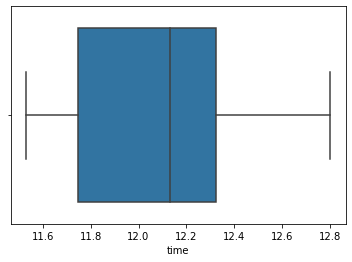

In [20]:
sns.boxplot(data=df, x='time')

In [21]:
iqr = scipy.stats.iqr(df.time)
upper_limit = np.percentile(df.time, 75) + 1.5*iqr

In [22]:
12.97 > upper_limit

False

### Cardiovascular Disease

In [23]:
df = pd.read_excel('data/Cholesterol.xlsx').set_index('Subject')
df.Difference = df.Before - df.After

In [24]:
df.sample(5)

,Before,After,Difference
Subject,,,
15,151,149,2
12,197,169,28
23,178,137,41
5,244,208,36
7,250,202,48


#### 2.13

In [25]:
df.Difference.mean()

19.541666666666668

#### 2.14

In [26]:
df.Difference.mean()

19.541666666666668

In [27]:
df.Difference.std()

16.805742203618763

#### 2.16

In [28]:
df.Difference.median()

19.0

#### 2.17

<AxesSubplot:xlabel='Difference'>

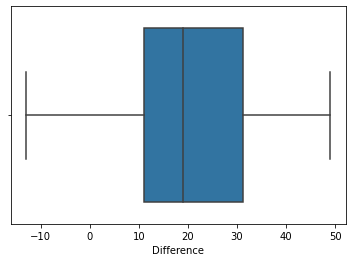

In [29]:
sns.boxplot(data=df, x='Difference')

#### 2.18

In [30]:
df['base_level'] = (df.Before < df.Before.median()).map({True: 'low', False: 'high'})

<AxesSubplot:xlabel='base_level', ylabel='Difference'>

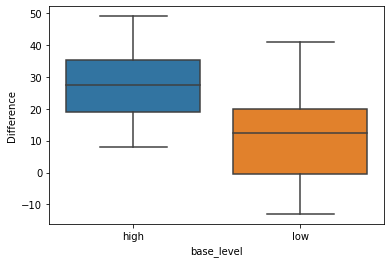

In [31]:
sns.boxplot(data=df, x='base_level', y='Difference')

### Hypertension

In [32]:
df = pd.read_excel('data/hypertension.xlsx').set_index('Participant')
df.sample(5)

,Recumbent systolic,Recumbent diastolic,Standing systolic,Standing diastolic
Participant,,,,
R. T. K.,134,76,126,68
F. P. V.,122,72,118,78
E. J. H.,142,88,136,90
E. W. G.,138,80,124,76
T. H. S.,102,68,96,64


#### 2.19

In [33]:
df['Systolic diff'] = df['Recumbent systolic'] - df['Standing systolic']
df['Diastolic diff'] = df['Recumbent diastolic'] - df['Standing diastolic']

In [34]:
df['Systolic diff'].mean(), df['Systolic diff'].median()

(8.8125, 8.0)

In [35]:
df['Diastolic diff'].mean(), df['Diastolic diff'].median()

(0.9375, 1.0)

#### 2.20

<AxesSubplot:ylabel='Diastolic diff'>

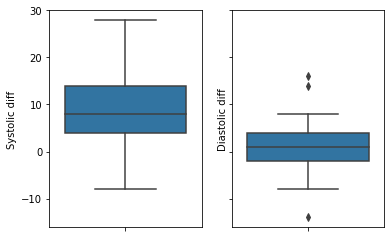

In [36]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.boxplot(data=df, y='Systolic diff', ax=ax1)
sns.boxplot(data=df, y='Diastolic diff', ax=ax2)

#### 2.22

In [37]:
df['Systolic diff'].quantile([0.1, 0.9])

0.1     0.2
0.9    15.8
Name: Systolic diff, dtype: float64

### Pulmonary Disease

In [38]:
df = pd.read_csv('data/FEV.DAT.txt').clean_names().set_index('id')
df.sample(5)

,age,fev,hgt,sex,smoke
id,,,,,
48951,11,2.563,63.0,0,0
51302,12,3.231,63.0,1,0
18502,10,1.823,57.0,0,0
63101,10,2.838,63.0,0,0
48441,16,4.070,69.5,1,1


#### 2.23

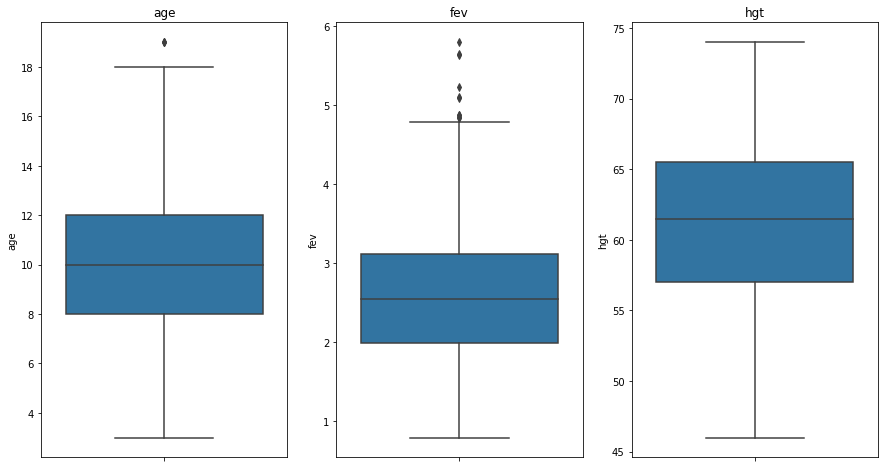

In [39]:
cols = df.columns[:3]
f, axes = plt.subplots(1, len(cols), figsize=(15, 8))
for ax, col in zip(axes, cols):
    sns.boxplot(data=df, y=col, ax=ax).set_title(col)

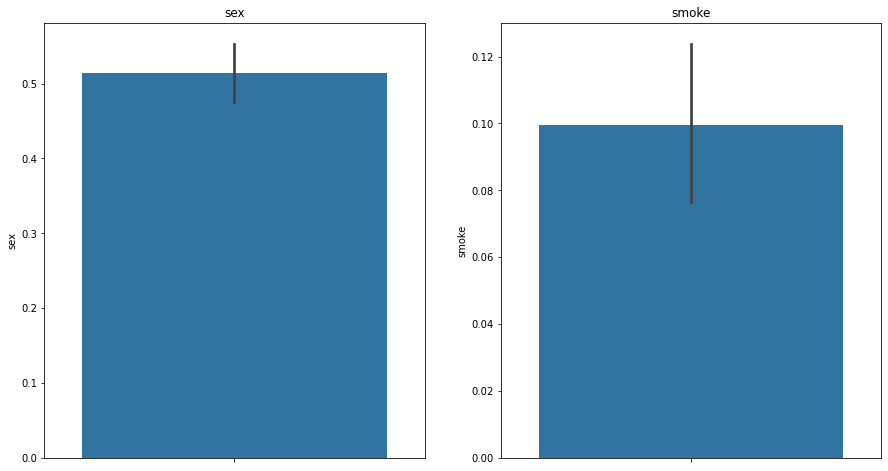

In [40]:
cols = df.columns[3:]
f, axes = plt.subplots(1, len(cols), figsize=(15, 8))
for ax, col in zip(axes, cols):
    sns.barplot(data=df, y=col, ax=ax).set_title(col)

#### 2.24

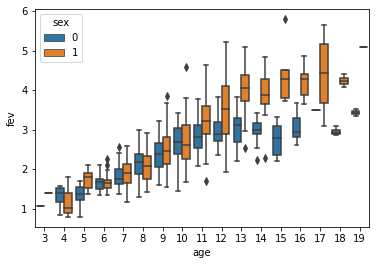

In [41]:
sns.boxplot(data=df, y='fev', x='age', hue='sex');

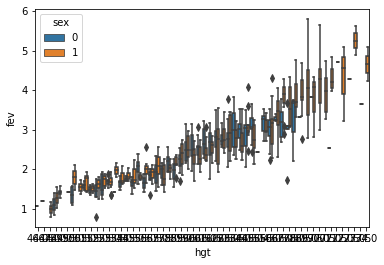

In [42]:
sns.boxplot(data=df, y='fev', x='hgt', hue='sex');

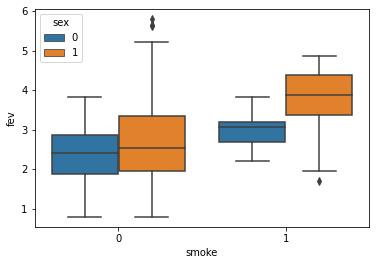

In [43]:
sns.boxplot(data=df, y='fev', x='smoke', hue='sex');

#### 2.25

In [44]:
df['age_ctg'] = pd.cut(df.age, [2, 4, 9, 14, 19])

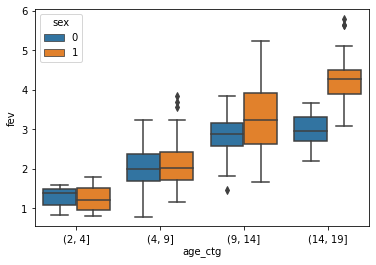

In [45]:
sns.boxplot(data=df, y='fev', x='age_ctg', hue='sex');

In [46]:
df.groupby(['age_ctg', 'sex']).fev.mean().unstack()

sex,0,1
age_ctg,,
"(2, 4]",1.280857,1.248250
"(4, 9]",2.028878,2.092733
"(9, 14]",2.872844,3.286729
"(14, 19]",2.961864,4.319852


### Nutrition

In [47]:
df = pd.read_csv('data/VALID.DAT.txt').clean_names().set_index('id')
df.sample(5)

,sfat_dr,sfat_ffq,tfat_dr,tfat_ffq,alco_dr,alco_ffq,cal_dr,cal_ffq
id,,,,,,,,
133497,24.78,11.8,73.18,28.0,0.00,0.00,1470,662.4
111970,32.03,38.2,71.02,98.8,37.28,45.08,1810,2220.0
131023,36.16,18.5,100.56,52.6,8.65,4.55,2051,1219.8
134350,30.92,20.2,82.98,51.8,17.76,15.86,1779,1187.8
135547,31.35,35.3,76.92,75.1,7.82,12.08,1767,1627.5


#### 2.26

In [48]:
df.describe()

,sfat_dr,sfat_ffq,tfat_dr,tfat_ffq,alco_dr,alco_ffq,cal_dr,cal_ffq
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,24.931734,21.915607,68.615376,56.076879,8.962948,8.951329,1619.872832,1371.730058
std,6.772596,9.275395,16.290839,21.970692,9.664045,12.254817,323.411603,482.053536
min,11.820000,5.600000,35.900000,14.800000,0.000000,0.000000,910.000000,463.200000
25%,20.200000,15.600000,56.160000,40.800000,1.760000,0.760000,1418.000000,1035.500000
50%,24.160000,19.900000,68.280000,51.700000,5.840000,4.550000,1606.000000,1297.600000
75%,28.260000,25.800000,77.980000,68.000000,12.970000,11.860000,1781.000000,1589.600000
max,46.360000,57.400000,119.830000,133.500000,49.150000,64.750000,2518.000000,3077.300000


<AxesSubplot:>

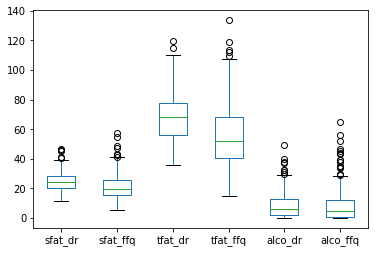

In [49]:
df.iloc[:,:-2].plot(kind='box')

<AxesSubplot:>

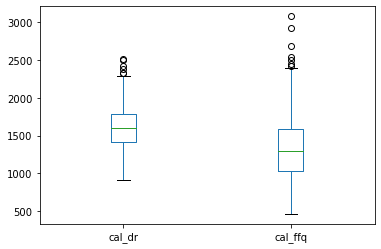

In [50]:
df.iloc[:,-2:].plot(kind='box')

#### 2.27

DR have greater values and have less spread

#### 2.28 

In [51]:
df.quantile([.2, .4, .6, .8, 1])

,sfat_dr,sfat_ffq,tfat_dr,tfat_ffq,alco_dr,alco_ffq,cal_dr,cal_ffq
0.2,18.806,14.84,54.070,38.12,0.870,0.760,1369.8,980.58
0.4,22.590,18.28,64.330,47.08,4.100,2.570,1532.2,1209.26
0.6,26.024,21.96,70.988,56.34,8.092,6.656,1671.8,1387.30
0.8,29.482,27.66,80.532,73.04,15.654,12.882,1874.8,1703.54
1.0,46.360,57.40,119.830,133.50,49.150,64.750,2518.0,3077.30


#### 2.29

In [52]:
df['tfat_dr_cal'] = df.tfat_dr*9/df.cal_dr*100
df['tfat_ffq_cal'] = df.tfat_ffq*9/df.cal_ffq*100

In [54]:
df[['tfat_dr_cal', 'tfat_ffq_cal']].describe()

,tfat_dr_cal,tfat_ffq_cal
count,173.000000,173.000000
mean,38.066267,36.855436
std,4.204829,6.728769
min,27.507580,15.924933
25%,35.178915,32.733325
50%,38.645562,36.365615
75%,40.997337,41.293096
max,47.597315,57.847534


#### 2.30

In [55]:
df[['tfat_dr_cal', 'tfat_ffq_cal']].quantile([.2, .4, .6, .8, 1])

,tfat_dr_cal,tfat_ffq_cal
0.2,33.958365,31.402684
0.4,37.328678,35.179624
0.6,39.764230,38.369988
0.8,41.628446,41.742806
1.0,47.597315,57.847534


### Environmental Health, Pediatrics

In [70]:
df = pd.read_csv('data/LEAD.DAT.txt').clean_names().set_index('id')
df.sample(5)

,area,ageyrs,sex,iqv_inf,iqv_comp,iqv_ar,iqv_ds,iqv_raw,iqp_pc,iqp_bd,...,_2plat_r,_2plar_l,visrea_r,visrea_l,audrea_r,audrea_l,fwt_r,fwt_l,hyperact,maxfwt
id,,,,,,,,,,,,,,,,,,,,,
144,2,8.08,1,7,11,11,9,32,12,12,...,12,9,38,32,32,29,45,30,1,45
412,3,4.75,2,7,7,10,8,32,13,13,...,99,99,99,99,99,99,99,99,0,99
605,2,5.17,2,6,7,7,8,28,8,0,...,8,6,64,56,61,63,42,27,1,42
404,1,4.58,1,6,3,4,2,15,12,7,...,99,99,99,99,99,99,99,99,1,99
105,1,11.25,1,5,4,8,5,22,5,10,...,17,16,26,34,31,33,51,42,99,51


In [71]:
df['group'] = df['group'].map({1: 'control', 2: 'exposed'})

In [72]:
df.group.value_counts()

control    78
exposed    46
Name: group, dtype: int64

#### 2.31

<AxesSubplot:xlabel='group', ylabel='ageyrs'>

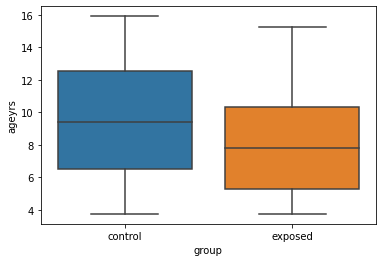

In [80]:
sns.boxplot(data=df, x='group', y='ageyrs')

<AxesSubplot:xlabel='group', ylabel='sex'>

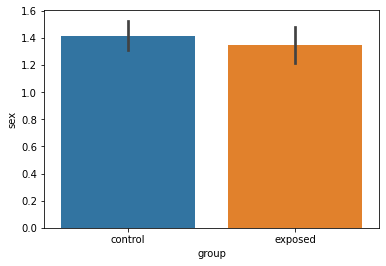

In [85]:
sns.barplot(data=df, x='group', y='sex')

#### 2.32

<AxesSubplot:xlabel='group', ylabel='iqp'>

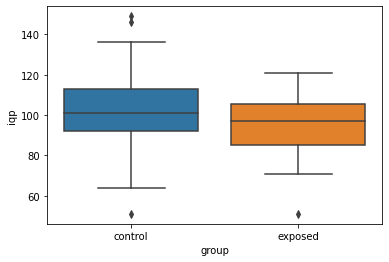

In [87]:
sns.boxplot(data=df, x='group', y='iqp')

<AxesSubplot:xlabel='group', ylabel='iqv'>

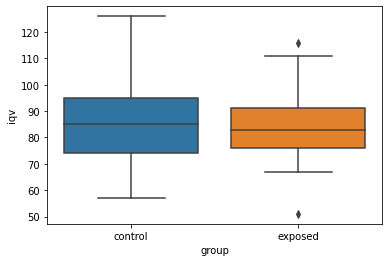

In [88]:
sns.boxplot(data=df, x='group', y='iqv')

### Cardiovascular Disease

In [90]:
df = pd.read_csv('data/APC.csv').clean_names().set_index('sample')

,a,b,a_b
sample,,,
8,2.24,2.29,−0.05
6,3.29,3.04,0.25
7,3.85,3.57,0.28
10,3.30,3.16,0.14
5,2.68,2.26,0.42


#### 2.33

In [108]:
df['mean'] = df[['a', 'b']].mean(axis=1)
df['std'] =  df[['a', 'b']].std(axis=1, ddof=0)
df['cv'] = 100*df['std']/df['mean']

#### 2.34

In [111]:
df.cv.mean()

4.772638458826677

### Microbiology

In [121]:
df = pd.read_csv('data/soy_plants.csv').clean_names().set_index('sample')
df.sample(5)

,i,u
sample,,
4,1.53,1.54
7,1.79,2.11
1,1.76,0.49
8,1.21,0.92
6,1.96,0.75


In [122]:
df_piv = df.pivot_longer(values_to='weight', names_to='soil')

#### 2.35

In [124]:
df_piv.groupby('soil').describe()

weight                                                     
      count     mean       std   min    25%    50%     75%   max
soil                                                            
i       8.0  1.63375  0.419896  1.03  1.390  1.645  1.8325  2.34
u       8.0  1.08375  0.509788  0.49  0.825  0.960  1.1425  2.11

#### 2.36

<AxesSubplot:xlabel='soil', ylabel='weight'>

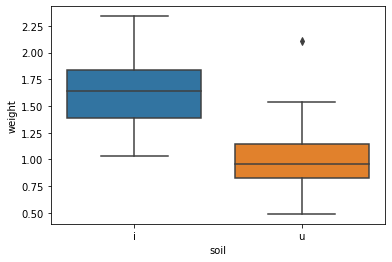

In [126]:
sns.boxplot(data=df_piv, x='soil', y='weight')

#### 2.37

Inoculation outperforms the second group